In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
df=pd.read_csv('Iris.csv')

In [19]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
df=df.iloc[:,1:]

In [21]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
encoder = LabelEncoder()

In [24]:
df['Species'] = encoder.fit_transform(df['Species'])

In [25]:
df.shape

(150, 5)

In [26]:
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [28]:
df = df[df['Species']!=0][['SepalWidthCm','PetalLengthCm','Species']]

In [29]:
df.shape

(100, 3)

In [30]:
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [31]:
import seaborn as sns

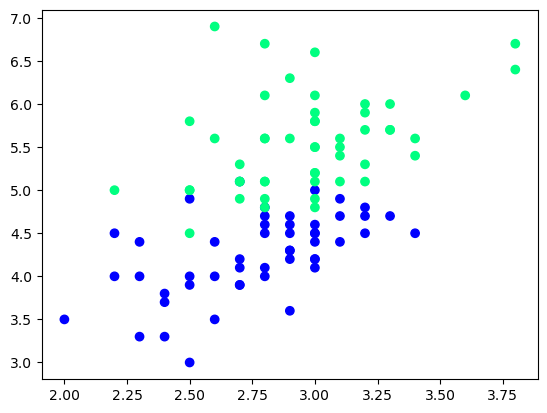

In [33]:
plt.scatter(df['SepalWidthCm'],df['PetalLengthCm'],c=df['Species'],cmap='winter')

In [35]:
df=df.sample(100)  #To make the data random. Before 1st 50 was 1 and next 50 was 2.

In [38]:
df.tail()

,SepalWidthCm,PetalLengthCm,Species
55,2.8,4.5,1
104,3.0,5.8,2
146,2.5,5.0,2
62,2.2,4.0,1
103,2.9,5.6,2


In [40]:
df_train = df.iloc[:60,:].sample(10)  #Taking only 10 rows for training
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [41]:
df_train

,SepalWidthCm,PetalLengthCm,Species
68,2.2,4.5,1
56,3.3,4.7,1
92,2.6,4.0,1
121,2.8,4.9,2
133,2.8,5.1,2
70,3.2,4.8,1
93,2.3,3.3,1
110,3.2,5.1,2
100,3.3,6.0,2
135,3.0,6.1,2


In [42]:
df_val

,SepalWidthCm,PetalLengthCm,Species
91,3.0,4.6,1
130,2.8,6.1,2
82,2.7,3.9,1
101,2.7,5.1,2
66,3.0,4.5,1


In [43]:
df_test

,SepalWidthCm,PetalLengthCm,Species
103,2.9,5.6,2
62,2.2,4.0,1
98,2.5,3.0,1
143,3.2,5.9,2
146,2.5,5.0,2


In [44]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

# Case-1 Bagging

In [66]:
#Data for Tree 1
df_bag = df_train.sample(8,replace=True)

X=df_bag.iloc[:,0:2]
y=df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
133,2.8,5.1,2
56,3.3,4.7,1
135,3.0,6.1,2
93,2.3,3.3,1
121,2.8,4.9,2
93,2.3,3.3,1
135,3.0,6.1,2
68,2.2,4.5,1


In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [68]:
dt_bag1 = DecisionTreeClassifier()

In [69]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

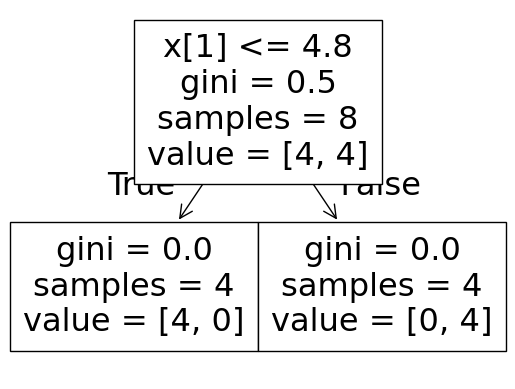

1.0


C:\Users\Ashwini Kumar\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Ashwini Kumar\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


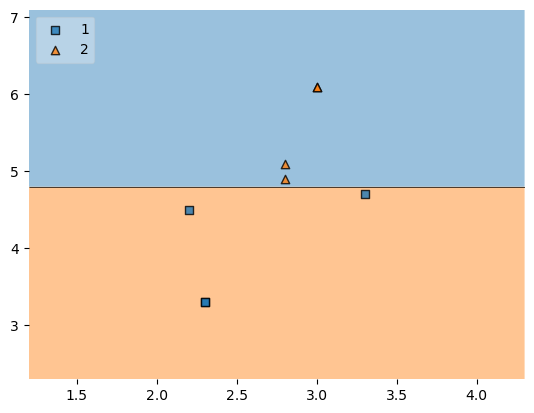

In [70]:
evaluate(dt_bag1,X,y)

In [71]:
#Tree - 2
df_bag = df_train.sample(8,replace=True)

X=df_bag.iloc[:,0:2]
y=df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
121,2.8,4.9,2
133,2.8,5.1,2
121,2.8,4.9,2
68,2.2,4.5,1
92,2.6,4.0,1
121,2.8,4.9,2
121,2.8,4.9,2
92,2.6,4.0,1


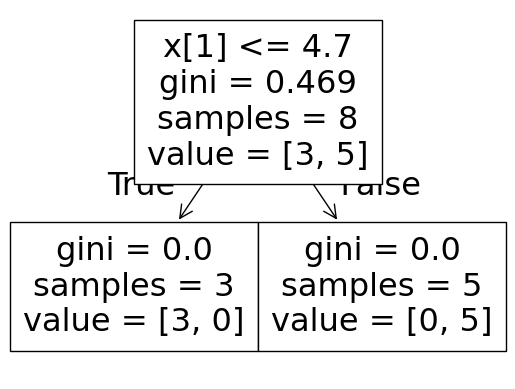

1.0


C:\Users\Ashwini Kumar\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Ashwini Kumar\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


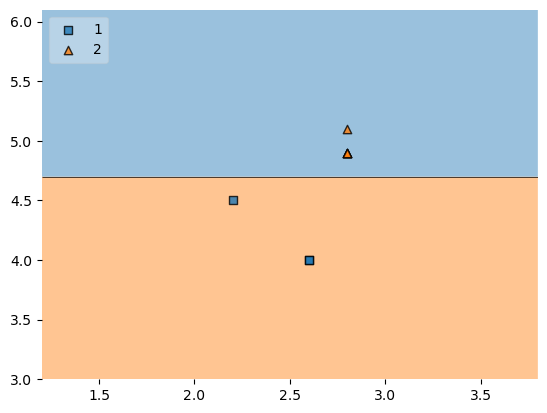

In [72]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [73]:
#Tree - 3
df_bag = df_train.sample(8,replace=True)

X=df_bag.iloc[:,0:2]
y=df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
121,2.8,4.9,2
68,2.2,4.5,1
93,2.3,3.3,1
133,2.8,5.1,2
100,3.3,6.0,2
133,2.8,5.1,2
92,2.6,4.0,1
56,3.3,4.7,1


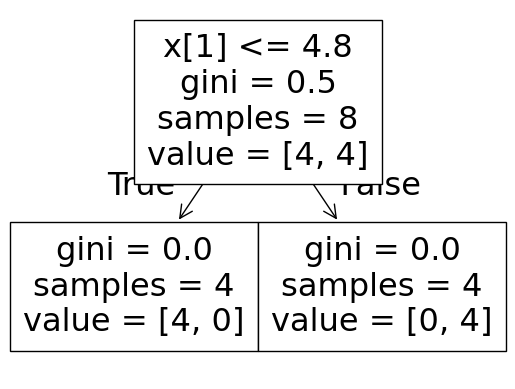

1.0


C:\Users\Ashwini Kumar\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Ashwini Kumar\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


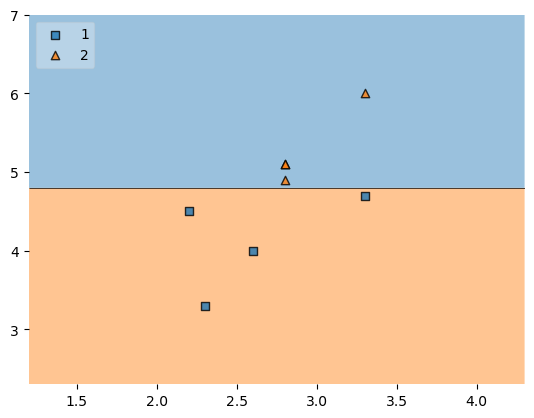

In [77]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

# Prediction

In [78]:
df_test

,SepalWidthCm,PetalLengthCm,Species
103,2.9,5.6,2
62,2.2,4.0,1
98,2.5,3.0,1
143,3.2,5.9,2
146,2.5,5.0,2


In [95]:
print("Predictor 1",dt_bag1.predict(np.array([3.3,4.7]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([3.3,4.7]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([3.3,4.7]).reshape(1,2)))

Predictor 1 [1]
Predictor 2 [1]
Predictor 3 [1]


C:\Users\Ashwini Kumar\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Ashwini Kumar\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Ashwini Kumar\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
